In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2024-03-28 23:27:23.349126: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 23:27:23.349209: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 23:27:23.349238: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 23:27:23.356828: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
for dirname, _, filenames in os.walk(r'../dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../dataset/Tuesday-WorkingHours.pcap_ISCX.csv
../dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
../dataset/Monday-WorkingHours.pcap_ISCX.csv
../dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
../dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
../dataset/Wednesday-workingHours.pcap_ISCX.csv
../dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
../dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

df1=pd.read_csv(r"../dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df2=pd.read_csv(r"../dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df3=pd.read_csv(r"../dataset/Monday-WorkingHours.pcap_ISCX.csv")
df4=pd.read_csv(r"../dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df5=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df6=pd.read_csv(r"../dataset/Wednesday-workingHours.pcap_ISCX.csv")
df7=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df8=pd.read_csv(r"../dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")

In [3]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

nRow, nCol = df.shape

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [6]:
df.isnull().sum()

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1358
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  

In [8]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

307078 fully duplicate rows to remove


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.duplicated().sum(), "fully duplicate rows to remove")

0 fully duplicate rows to remove


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520798 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [12]:
df_encoded = df.copy()

le = LabelEncoder()

df_encoded[' Label'] = le.fit_transform(df[' Label'])

X = df_encoded.drop(' Label', axis=1)
y = df_encoded[' Label']

In [13]:
X = df.drop(' Label', axis=1)
y = df[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print(y_train.value_counts())

 Label
BENIGN                        1676045
DoS Hulk                       138277
DDoS                           102411
PortScan                        72555
DoS GoldenEye                    8229
FTP-Patator                      4745
DoS slowloris                    4308
DoS Slowhttptest                 4182
SSH-Patator                      2575
Bot                              1558
Web Attack � Brute Force         1176
Web Attack � XSS                  522
Infiltration                       29
Web Attack � Sql Injection         17
Heartbleed                          9
Name: count, dtype: int64


In [15]:
sampling_strategy_over = {
    "DoS Hulk": 200000, 
    "DDoS": 150000, 
    "PortScan": 100000, 
    "DoS GoldenEye": 10000, 
    "FTP-Patator": 7000, 
    "DoS slowloris": 7000, 
    "DoS Slowhttptest": 7000, 
    "SSH-Patator": 5000, 
    "Bot": 3000, 
    "Web Attack � Brute Force": 2000, 
    "Web Attack � XSS": 1500, 
    "Infiltration": 1500, 
    "Web Attack � Sql Injection": 1500, 
    "Heartbleed": 1500
}

# undersampling the majority class
sampling_strategy_under = {
    "BENIGN": 500000  

In [16]:
over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)


X_train_res, y_train_res = over.fit_resample(X_train, y_train)
X_train_res, y_train_res= under.fit_resample(X_train_res, y_train_res)

print(y_train_res.value_counts())


 Label
BENIGN                        500000
DoS Hulk                      200000
DDoS                          150000
PortScan                      100000
DoS GoldenEye                  10000
DoS Slowhttptest                7000
DoS slowloris                   7000
FTP-Patator                     7000
SSH-Patator                     5000
Bot                             3000
Web Attack � Brute Force        2000
Heartbleed                      1500
Infiltration                    1500
Web Attack � Sql Injection      1500
Web Attack � XSS                1500
Name: count, dtype: int64


In [18]:
X_train_res,y_train_res=X_train, y_train

In [17]:
# Normalize the features
scaler = MinMaxScaler()

# Fit on resampled training data and transform both train and test data
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit on resampled training labels and transform both train and test labels
y_train_res_encoded = label_encoder.fit_transform(y_train_res)
y_test_encoded = label_encoder.transform(y_test)
# Convert label encoded labels to one-hot encoded format
y_train_res_one_hot = to_categorical(y_train_res_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb_gscv = GridSearchCV(gnb, param_grid, cv=5)

gnb_gscv.fit(X_train_res_scaled, y_train_res_encoded)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [19]:
print("Best Parameters:\n", gnb_gscv.best_params_)


Best Parameters:
 {'var_smoothing': 1e-09}


In [20]:
best_gnb = GaussianNB(var_smoothing=gnb_gscv.best_params_['var_smoothing'])

best_gnb.fit(X_train_res_scaled, y_train_res_encoded)


GaussianNB()

In [21]:
y_pred = best_gnb.predict(X_test_scaled)


In [22]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Classification Report:\n", report)


Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      0.67      0.80    419012
                       Bot       0.00      0.75      0.01       390
                      DDoS       0.89      0.96      0.92     25603
             DoS GoldenEye       0.16      0.92      0.27      2057
                  DoS Hulk       0.93      0.88      0.90     34569
          DoS Slowhttptest       0.11      0.64      0.18      1046
             DoS slowloris       0.07      0.64      0.12      1077
               FTP-Patator       0.68      1.00      0.81      1186
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.00      1.00      0.01         7
                  PortScan       0.70      0.98      0.82     18139
               SSH-Patator       0.36      0.91      0.51       644
  Web Attack � Brute Force       0.00      0.04      0.00       294
Web Attack � Sql Inject

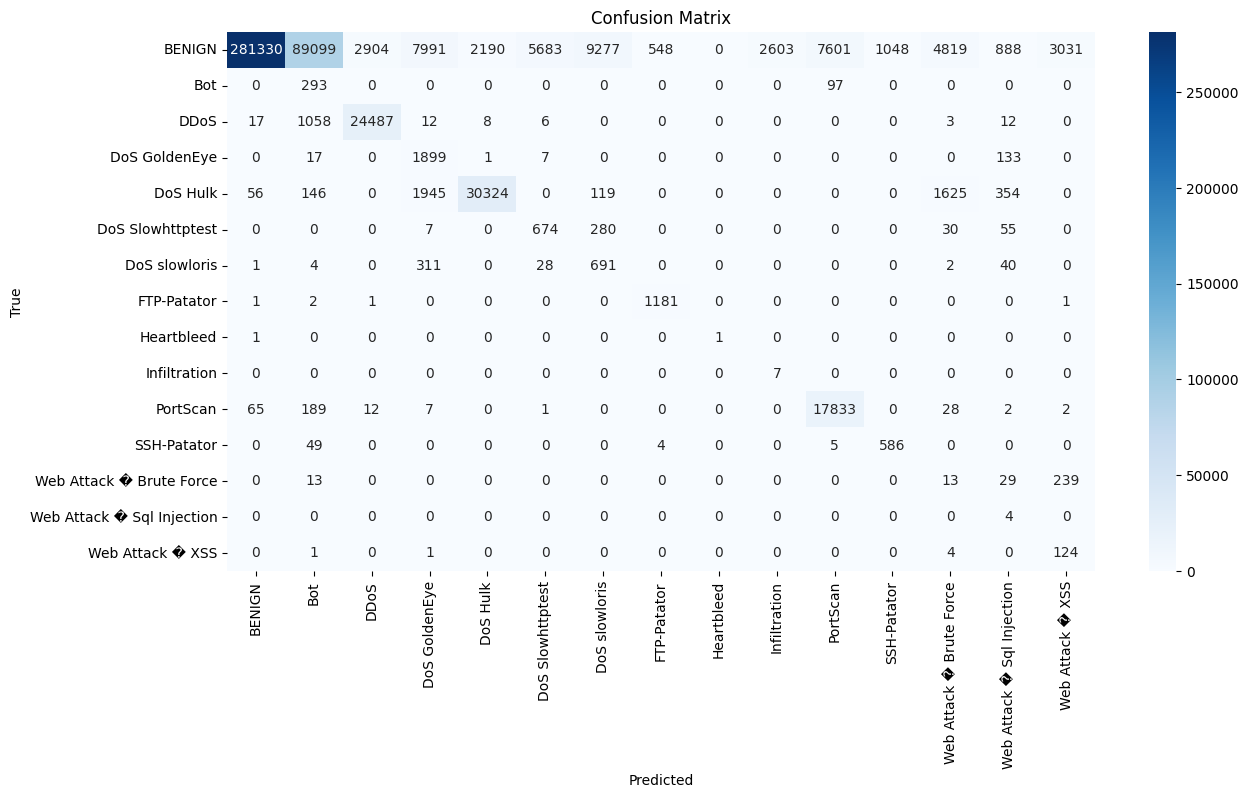

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


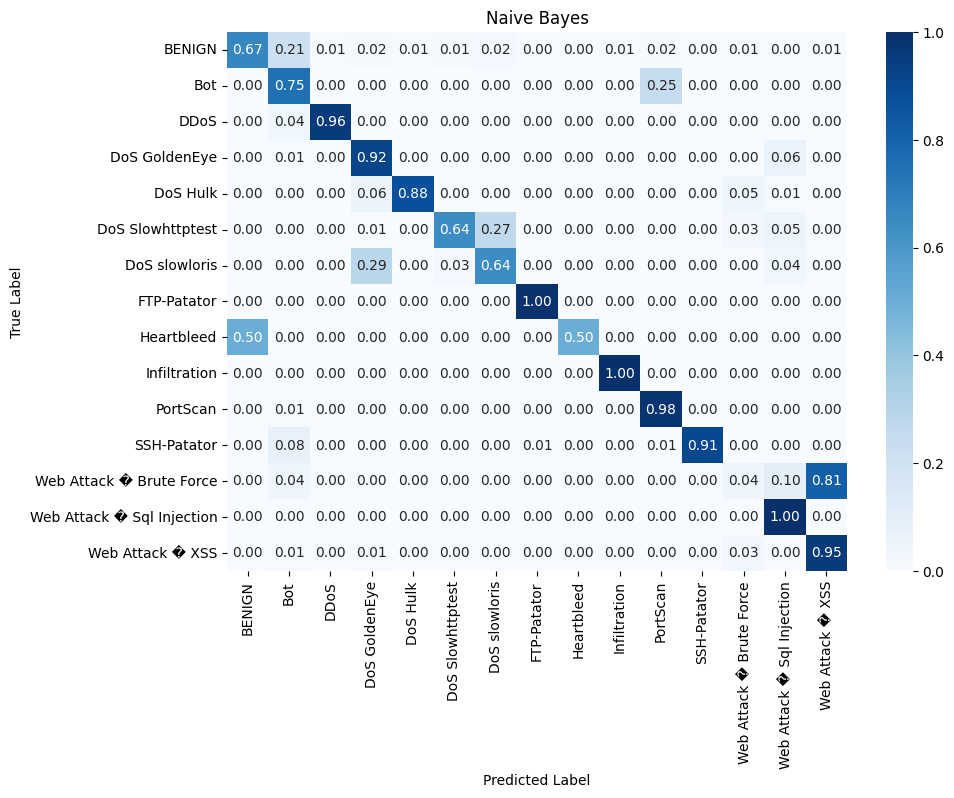

In [42]:
# Normalize the confusion matrix by rows
row_sums = cm.sum(axis=1)
conf_matrix_normalized = cm / row_sums[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)  # Use fmt=".2f" to format the numbers
plt.title("Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [43]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score



accuracy = accuracy_score(y_test_encoded, y_pred)

# Compute weighted average precision, recall, f1-score
precision_weighted, recall_weighted, f1_score_weighted, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')
print(f"Weighted Average Precision: {precision_weighted:.4f}")
print(f"Weighted Average Recall: {recall_weighted:.4f}")
print(f"Weighted Average F1-Score: {f1_score_weighted:.4f}")

# Compute micro average precision, recall, f1-score
precision_micro, recall_micro, f1_score_micro, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='macro')
print(f"Micro Average Precision: {precision_micro:.4f}")
print(f"Micro Average Recall: {recall_micro:.4f}")
print(f"Micro Average F1-Score: {f1_score_micro:.4f}")

# Print overall accuracy
print(f"Overall Accuracy: {accuracy:.4f}")


Weighted Average Precision: 0.9682
Weighted Average Recall: 0.7130
Weighted Average F1-Score: 0.8102
Micro Average Precision: 0.3959
Micro Average Recall: 0.7902
Micro Average F1-Score: 0.4065
Overall Accuracy: 0.7130


In [27]:
# Categorial

In [19]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV

cnb = CategoricalNB()

param_grid = {'min_categories': [2, 3, 4, 5]}

grid_search = GridSearchCV(estimator=cnb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_res_scaled, y_train_res_encoded)

print("Best Hyperparameter (min_categories):", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Hyperparameter (min_categories): {'min_categories': 2}
Best Score: 0.5471083249749247


Accuracy: 0.6868692478578229


/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/x1/rsingh8/anaconda3/envs/tf_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

                            precision    recall  f1-score   support

                    BENIGN       0.90      0.75      0.82    419012
                       Bot       0.00      0.00      0.00       390
                      DDoS       0.14      0.00      0.00     25603
             DoS GoldenEye       1.00      0.00      0.00      2057
                  DoS Hulk       0.73      0.34      0.47     34569
          DoS Slowhttptest       0.00      0.00      0.00      1046
             DoS slowloris       0.00      0.00      0.00      1077
               FTP-Patator       0.00      0.00      0.00      1186
                Heartbleed       0.14      0.50      0.22         2
              Infiltration       0.01      0.14      0.01         7
                  PortScan       0.13      1.00      0.24     18139
               SSH-Patator       0.00      0.00      0.00       644
  Web Attack � Brute Force       0.00      0.00      0.00       294
Web Attack � Sql Injection       0.00      0.00

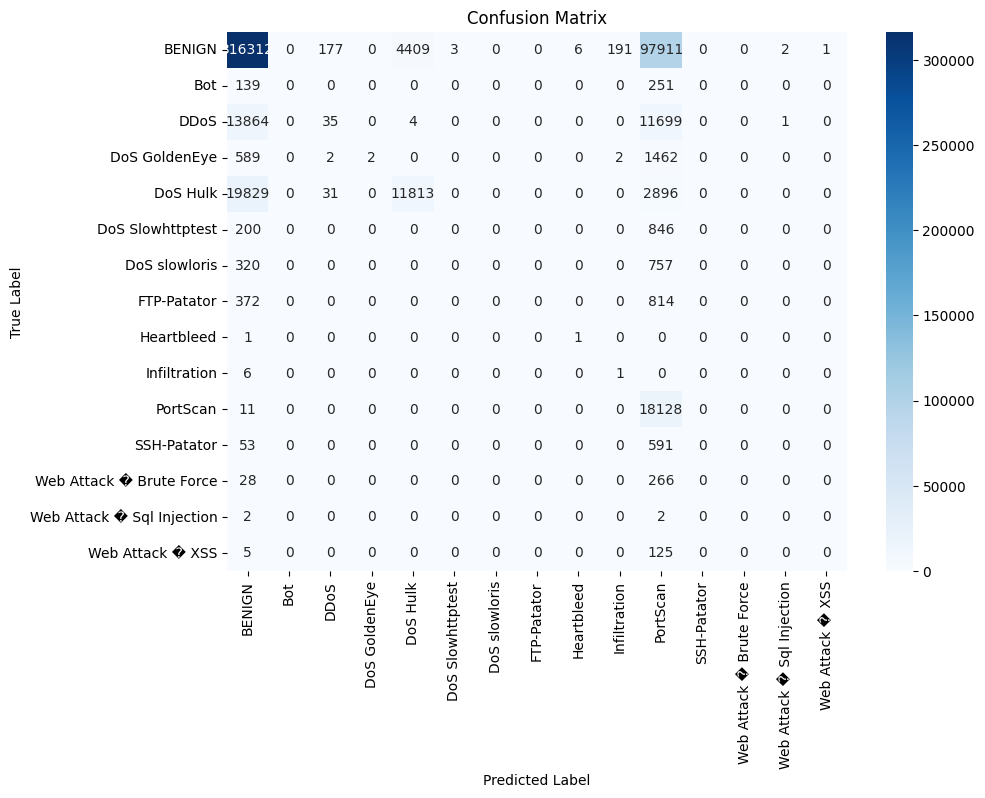

In [20]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cnb_best = CategoricalNB(min_categories=2)
cnb_best.fit(X_train_res_scaled, y_train_res_encoded)

y_pred = cnb_best.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Categorial NB worked terbally bad. Will be using gaussian.

In [28]:
# Basic imports
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

df1=pd.read_csv(r"../dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df2=pd.read_csv(r"../dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df3=pd.read_csv(r"../dataset/Monday-WorkingHours.pcap_ISCX.csv")
df4=pd.read_csv(r"../dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df5=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df6=pd.read_csv(r"../dataset/Wednesday-workingHours.pcap_ISCX.csv")
df7=pd.read_csv(r"../dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df8=pd.read_csv(r"../dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")

In [30]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

nRow, nCol = df.shape

In [31]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [32]:
df.describe()

/x1/rsingh8/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/x1/rsingh8/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

In [33]:
from itertools import combinations
def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)
    
    num=df._get_numeric_data()
    num[num<0]=0
    
    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols, axis=1, inplace=True)
    print("Zero Variance Columns: ", zero_variance_cols, "are dropped.")
    print("Shape after removing the zero varaince columns: ",df.shape)
    
    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(),"rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)
    
    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)
    
    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)

Dataset Shape:  (2830743, 79)
Zero Variance Columns:  ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'] are dropped.
Shape after removing the zero varaince columns:  (2830743, 71)
2867 rows dropped
Shape after Removing NaN:  (2827876, 71)
Shape after dropping duplicates:  (2520798, 71)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd URG Flags', 'CWE Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1')]  dropped!
Shape after removing identical value columns:  (2520798, 66)


In [8]:
df['Label'].value_counts()

Label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [34]:

df_encoded = df.copy()

le = LabelEncoder()

df_encoded['Label'] = le.fit_transform(df['Label'])

X = df_encoded.drop('Label', axis=1)
y = df_encoded['Label']

In [35]:
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
print(y_train.value_counts())





Label
BENIGN                        1676045
DoS Hulk                       138277
DDoS                           102411
PortScan                        72555
DoS GoldenEye                    8229
FTP-Patator                      4745
DoS slowloris                    4308
DoS Slowhttptest                 4182
SSH-Patator                      2575
Bot                              1558
Web Attack � Brute Force         1176
Web Attack � XSS                  522
Infiltration                       29
Web Attack � Sql Injection         17
Heartbleed                          9
Name: count, dtype: int64


In [37]:
df.shape

(2520798, 66)

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Define the sampling strategies
sampling_strategy_over = {
    "DoS Hulk": 200000, 
    "DDoS": 150000, 
    "PortScan": 100000, 
    "DoS GoldenEye": 10000, 
    "FTP-Patator": 10000, 
    "DoS slowloris": 10000, 
    "DoS Slowhttptest": 10000, 
    "SSH-Patator": 10000, 
    "Bot": 10000, 
    "Web Attack � Brute Force": 10000, 
    "Web Attack � XSS": 10000, 
    "Infiltration": 10000, 
    "Web Attack � Sql Injection": 10000, 
    "Heartbleed": 10000
}

sampling_strategy_under = {
    "BENIGN": 500000
}


# Apply ADASYN instead of SMOTE
over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)




In [39]:
over = SMOTE(sampling_strategy=sampling_strategy_over)
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)



X_train_res, y_train_res = over.fit_resample(X_train, y_train)
X_train_res, y_train_res= under.fit_resample(X_train_res, y_train_res)

print(y_train_res.value_counts())


Label
BENIGN                        500000
DoS Hulk                      200000
DDoS                          150000
PortScan                      100000
Bot                            10000
DoS GoldenEye                  10000
DoS Slowhttptest               10000
DoS slowloris                  10000
FTP-Patator                    10000
Heartbleed                     10000
Infiltration                   10000
SSH-Patator                    10000
Web Attack � Brute Force       10000
Web Attack � Sql Injection     10000
Web Attack � XSS               10000
Name: count, dtype: int64


In [40]:
scaler = MinMaxScaler()

X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_res_encoded = label_encoder.fit_transform(y_train_res)
y_test_encoded = label_encoder.transform(y_test)
y_train_res_one_hot = to_categorical(y_train_res_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb_gscv = GridSearchCV(gnb, param_grid, cv=5)

gnb_gscv.fit(X_train_res_scaled, y_train_res_encoded)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [44]:
print("Best Parameters:\n", gnb_gscv.best_params_)


Best Parameters:
 {'var_smoothing': 1e-09}


In [45]:
best_gnb = GaussianNB(var_smoothing=gnb_gscv.best_params_['var_smoothing'])

best_gnb.fit(X_train_res_scaled, y_train_res_encoded)


GaussianNB()

In [46]:
y_pred = best_gnb.predict(X_test_scaled)


In [47]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Classification Report:\n", report)


Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      0.68      0.81    419012
                       Bot       0.00      0.75      0.01       390
                      DDoS       0.92      0.96      0.94     25603
             DoS GoldenEye       0.28      0.92      0.43      2057
                  DoS Hulk       0.84      0.88      0.86     34569
          DoS Slowhttptest       0.08      0.65      0.14      1046
             DoS slowloris       0.08      0.92      0.14      1077
               FTP-Patator       0.80      1.00      0.89      1186
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       0.00      1.00      0.01         7
                  PortScan       0.70      0.98      0.82     18139
               SSH-Patator       0.54      0.91      0.68       644
  Web Attack � Brute Force       0.00      0.04      0.01       294
Web Attack � Sql Inject

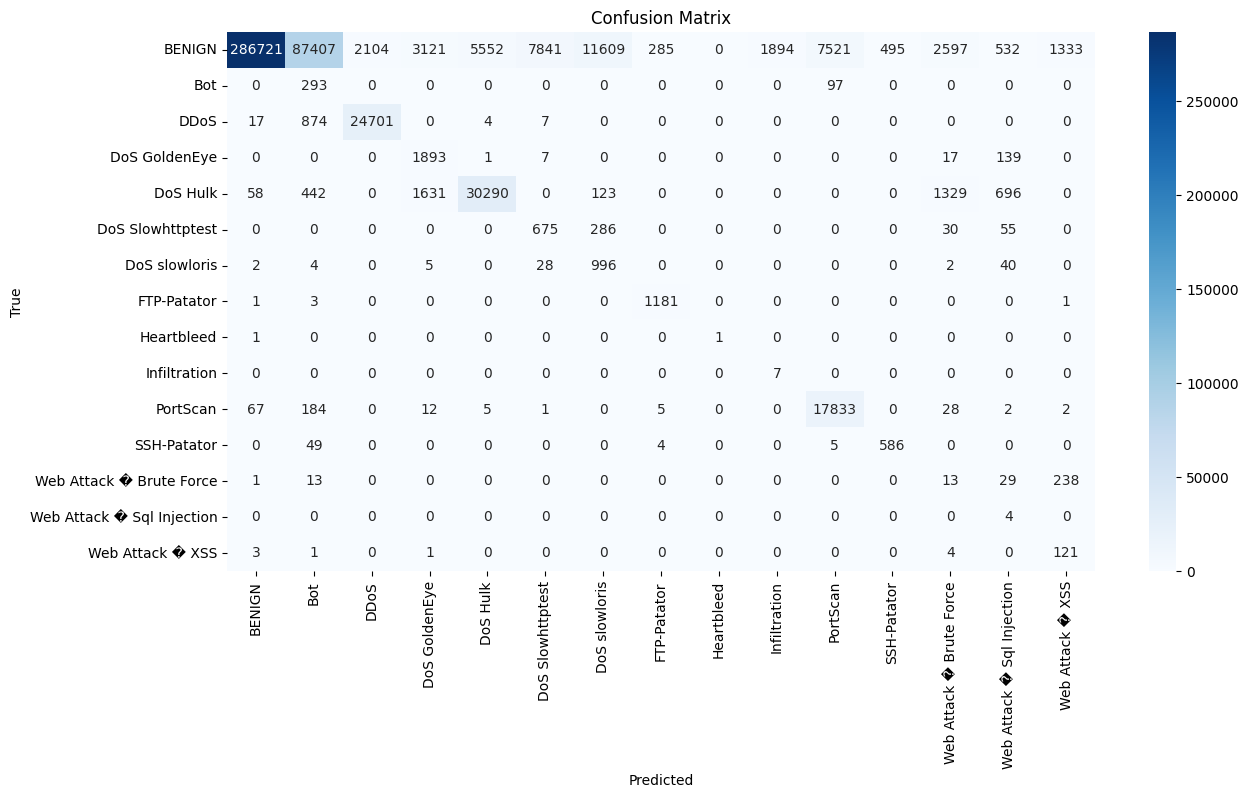

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


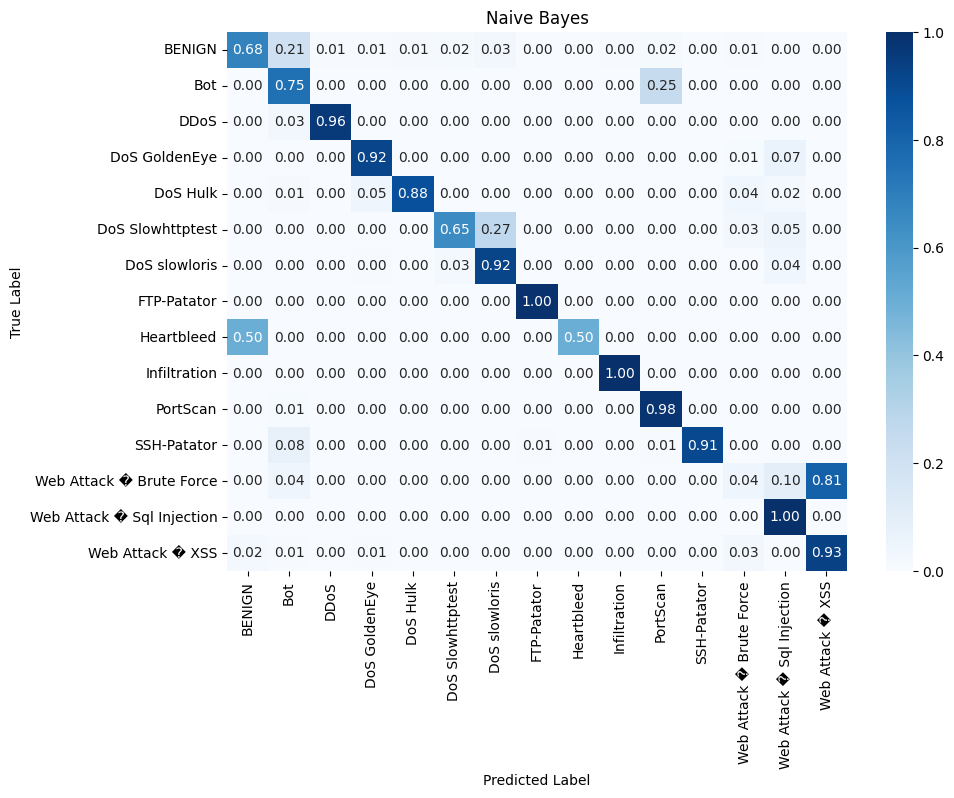

In [49]:
# Normalize the confusion matrix by rows
row_sums = cm.sum(axis=1)
conf_matrix_normalized = cm / row_sums[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)  # Use fmt=".2f" to format the numbers
plt.title("Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [50]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score


accuracy = accuracy_score(y_test_encoded, y_pred)

# Compute weighted average precision, recall, f1-score
precision_weighted, recall_weighted, f1_score_weighted, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='weighted')
print(f"Weighted Average Precision: {precision_weighted:.4f}")
print(f"Weighted Average Recall: {recall_weighted:.4f}")
print(f"Weighted Average F1-Score: {f1_score_weighted:.4f}")

# Compute micro average precision, recall, f1-score
precision_micro, recall_micro, f1_score_micro, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='macro')
print(f"Micro Average Precision: {precision_micro:.4f}")
print(f"Micro Average Recall: {recall_micro:.4f}")
print(f"Micro Average F1-Score: {f1_score_micro:.4f}")

# Print overall accuracy
print(f"Overall Accuracy: {accuracy:.4f}")


Weighted Average Precision: 0.9647
Weighted Average Recall: 0.7246
Weighted Average F1-Score: 0.8168
Micro Average Precision: 0.4222
Micro Average Recall: 0.8087
Micro Average F1-Score: 0.4361
Overall Accuracy: 0.7246
